In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf # deep learning lib with pre built functions for creating neural network

In [2]:
from keras.datasets import boston_housing # another deep learning lib with datasets and model building functions

In [3]:
# whenever we need to run cmd commands in jupyter, we use '!' in front. Example-> !pip install tensorflow

In [4]:
(train_X, train_y), (test_X, test_y) = boston_housing.load_data()

In [5]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((404, 13), (404,), (102, 13), (102,))

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
min_max_scaler = MinMaxScaler()

In [8]:
train_X = min_max_scaler.fit_transform(train_X)

In [9]:
# Now values will be berween 0 and 1. Data is normalised now.

In [10]:
train_X

array([[1.37816304e-02, 0.00000000e+00, 2.81524927e-01, ...,
        8.93617021e-01, 1.00000000e+00, 4.68818985e-01],
       [1.73654275e-04, 8.25000000e-01, 5.75513196e-02, ...,
        2.23404255e-01, 9.96167230e-01, 3.80794702e-02],
       [5.49837765e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.46089061e-01, 4.22185430e-02],
       ...,
       [3.18534767e-04, 3.50000000e-01, 2.05278592e-01, ...,
        4.57446809e-01, 9.12627969e-01, 1.68322296e-01],
       [2.40852297e-02, 0.00000000e+00, 7.00879765e-01, ...,
        2.23404255e-01, 6.59715568e-01, 3.87969095e-01],
       [9.07048543e-05, 6.00000000e-01, 9.05425220e-02, ...,
        3.19148936e-01, 9.49064501e-01, 7.31236203e-02]])

In [11]:
test_X = min_max_scaler.fit_transform(test_X)

In [12]:
test_X

array([[0.72190697, 0.        , 0.63650075, ..., 0.87804878, 0.00698455,
        0.90222813],
       [0.00440139, 0.        , 0.33144796, ..., 0.58536585, 0.99476158,
        0.47522448],
       [0.00167219, 0.        , 0.14969834, ..., 0.87804878, 1.        ,
        0.26005986],
       ...,
       [0.07273042, 0.        , 0.69230769, ..., 0.20731707, 0.98041639,
        0.        ],
       [0.01378101, 0.        , 0.18778281, ..., 0.53658537, 0.98603089,
        0.25906219],
       [0.11628215, 0.        , 0.69230769, ..., 0.20731707, 0.57893889,
        0.26238776]])

In [13]:
from tensorflow.keras.models import Sequential  # We use this when we need to create a model with layers that are added one by one.
from tensorflow.keras.layers import Dense       # It is the name of a layer, which is fully connected layer, Artificial Neural Network.
# If we were working with CNN(images) we would have use conv2d.

In [14]:
model = Sequential(name="Boston_Housing_using_ANN")  # We are building the architecture of the model layer.

In [15]:
model.add(Dense(256, input_dim = train_X.shape[1], activation = 'relu', name = "First_Layer")) # We will be using the models that are pre built moving forward then we need to ensure that the input shape matches that of our data.

C:\Users\prajwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.add(Dense(128, activation = 'relu', name = 'Second_layer'))

In [17]:
model.add(Dense(64, activation = 'relu', name = 'Third_Layer'))

In [18]:
model.add(Dense(32, activation = 'relu', name = 'Forth_Layer'))
model.add(Dense(1, activation = 'relu', name = 'Fifth_Layer'))

In [19]:
# If we were making a classification model and we had 3 categories to classify into, then we would have left the panel layer with 3 neurons,
# but since here we only have a single answer we are leaving only one neuron.

In [20]:
model.summary()

Model: "Boston_Housing_using_ANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ First_Layer (Dense)                  │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Second_layer (Dense)                 │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Third_Layer (Dense)                  │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Forth_Layer (Dense)                  │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Fifth_Layer (Dense)                  │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['mse']) 
# We are setting parameters for our model to use and follow, like the optimiser, evaluation metrics and more

In [22]:
# model.compile?

In [23]:
history = model.fit(train_X, train_y, batch_size = 50, epochs = 300, validation_split = 0.1)  

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 568.8908 - mse: 568.8908 - val_loss: 469.9875 - val_mse: 469.9875
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 558.0495 - mse: 558.0495 - val_loss: 380.8779 - val_mse: 380.8779
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 419.3770 - mse: 419.3770 - val_loss: 205.5677 - val_mse: 205.5677
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 229.1157 - mse: 229.1157 - val_loss: 92.4654 - val_mse: 92.4654
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 131.4567 - mse: 131.4567 - val_loss: 78.9703 - val_mse: 78.9703
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 105.5687 - mse: 105.5687 - val_loss: 52.2477 - val_mse: 52.2477
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 89.2104 - mse: 89.2104 - val_loss: 38.0198 - val_mse: 38.0198
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 69.8222 - mse: 69.8222 - val_loss: 31.3554 - val_mse: 31.3554
Epoch 9/300
8/8 ━━━━━━━━━━

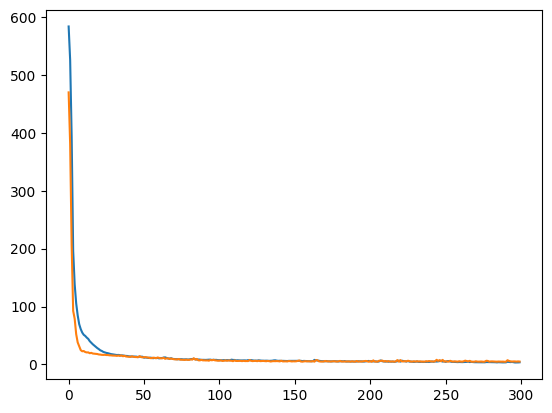

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

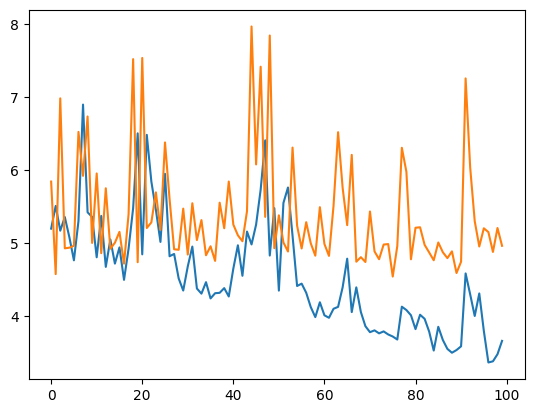

In [27]:
plt.plot(history.history['loss'][200:])
plt.plot(history.history['val_loss'][200:])
# Checking for first 200

In [28]:
# Observing of smaller area.

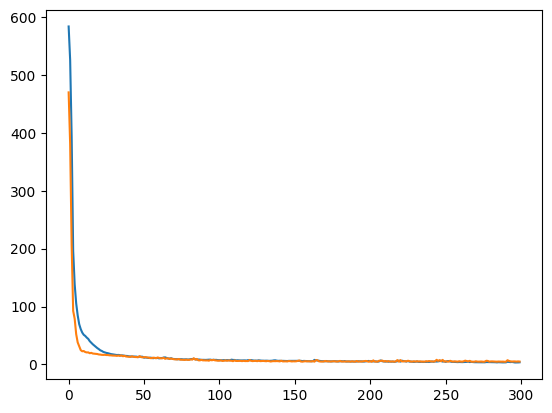

In [29]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

In [30]:
# mean square error

In [31]:
model.evaluate(test_X, test_y)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.9326 - mse: 28.9326 


[32.832637786865234, 32.832637786865234]

In [33]:
predictions = model.predict(test_X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [35]:
for i in range(len(predictions)):
    print(predictions[i], test_y[i]);
# We can check that our data is matching or not    

[7.8504453] 7.2
[15.981243] 18.8
[19.740862] 19.0
[23.033546] 27.0
[21.49414] 22.2
[20.30407] 24.5
[24.339249] 31.2
[18.709133] 22.9
[15.999543] 20.5
[16.245625] 23.2
[16.723686] 18.6
[13.920419] 14.5
[14.219312] 17.8
[42.500565] 50.0
[13.063784] 20.8
[17.670479] 24.3
[21.435383] 24.2
[17.106926] 19.8
[13.379552] 19.1
[15.646096] 22.7
[9.17632] 12.0
[12.0308] 10.2
[18.59405] 20.0
[12.164567] 18.5
[14.335519] 20.9
[16.81607] 23.0
[26.233028] 27.5
[22.678837] 30.1
[9.310843] 9.5
[17.477457] 22.0
[17.65605] 21.2
[11.248397] 14.1
[28.219463] 33.1
[20.134815] 23.4
[9.526314] 20.1
[7.146018] 7.4
[11.117805] 15.4
[12.524731] 23.8
[16.807987] 20.1
[21.872776] 24.5
[24.69896] 33.0
[24.337008] 28.4
[8.449779] 14.1
[38.635822] 46.7
[25.40527] 32.5
[24.038635] 29.6
[24.409103] 28.4
[15.358649] 19.8
[14.817263] 20.2
[20.241993] 25.0
[29.699036] 35.4
[15.854798] 20.3
[8.60654] 9.7
[12.707698] 14.5
[31.025425] 34.9
[24.182129] 26.6
[7.6558194] 7.2
[47.818123] 50.0
[29.233555] 32.4
[19.134232] 21.6
[1